# Feature Engineering - part 3



In [1]:
import re
import os
import time
import json
import numpy as np
import pandas as pd

import feature_engineering as Fe

import urlextract
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split

### Load Data

In [2]:
with open("contractions_map.json") as f:
    contractions_map = json.load(f)

url_extractor = urlextract.URLExtract()
lemmatizer = WordNetLemmatizer()

# load X, y train subsets
raw_path = os.path.join("..","data","1_raw")
X_train = pd.read_csv(os.path.join(raw_path, "X_train.csv"))
y_train = pd.read_csv(os.path.join(raw_path, "y_train.csv"))

# create arrays
X_array = np.array(X_train.iloc[:,0]).ravel()
y_array = np.array(y_train.iloc[:,0]).ravel()

In [3]:
X_array.shape, y_array.shape

((3900,), (3900,))

In [5]:
try:
    clean_docs, X_transformed = Fe.DocumentToFeaturesCounterTransformer().fit_transform(X_array)
except RuntimeWarning:
    pass

In [6]:
X_transformed[np.isnan(X_transformed)] = 0

### New Features

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
X_df = pd.DataFrame(X_transformed,
                    columns=["doclen_raw","doclen_cln",
                             "n_tokens","token_maxlen",
                             "token_meanlen","token_stdlen","rsr"])

X_df["target"] = y_array

In [9]:
X_df.head()

,doclen_raw,doclen_cln,n_tokens,token_maxlen,token_meanlen,token_stdlen,rsr,target
0,53.0,50.0,9.0,9.0,4.6667,2.2111,0.4524,ham
1,160.0,155.0,33.0,7.0,3.7273,1.3545,0.4309,spam
2,75.0,69.0,14.0,7.0,4.0000,1.7321,0.5000,ham
3,37.0,37.0,8.0,8.0,3.7500,2.4367,0.4333,ham
4,73.0,65.0,13.0,8.0,4.0769,1.8589,0.4906,ham


In [10]:
X_df.describe()

,doclen_raw,doclen_cln,n_tokens,token_maxlen,token_meanlen,token_stdlen,rsr
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,79.714359,75.913333,15.860000,7.736667,3.834410,1.791610,0.475802
std,58.108675,55.704255,11.300593,2.620698,0.690138,0.616968,0.087486
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,33.750000,7.000000,6.000000,3.400000,1.414200,0.424575
50%,61.000000,57.000000,12.000000,7.000000,3.777800,1.758200,0.471400
75%,121.000000,114.000000,23.000000,9.000000,4.200000,2.103400,0.520100
max,790.000000,781.000000,172.000000,37.000000,10.500000,6.676200,1.000000


In [11]:
# separate out positives and negatives for plotting
X_pos = X_df[X_df.target == "spam"]
X_neg = X_df[X_df.target == "ham"]

In [12]:
def plot_target_hist(X_pos, X_neg, feat_name, bins=100, log_=False):
    
    if log_:
        pos_ = np.log(X_pos[feat_name])
        neg_ = np.log(X_neg[feat_name])
        xlab = ' '.join(["Log", feat_name])
    else:
        pos_ = X_pos[feat_name]
        neg_ = X_neg[feat_name]
        xlab = feat_name
        
    plt.figure(figsize=(16,6))    
    plt.hist(pos_, bins=bins, alpha=0.5, label="spam")
    plt.hist(neg_, bins=bins, alpha=0.5, label="ham")
    plt.xlabel(xlab, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc='upper right')
    plt.show()

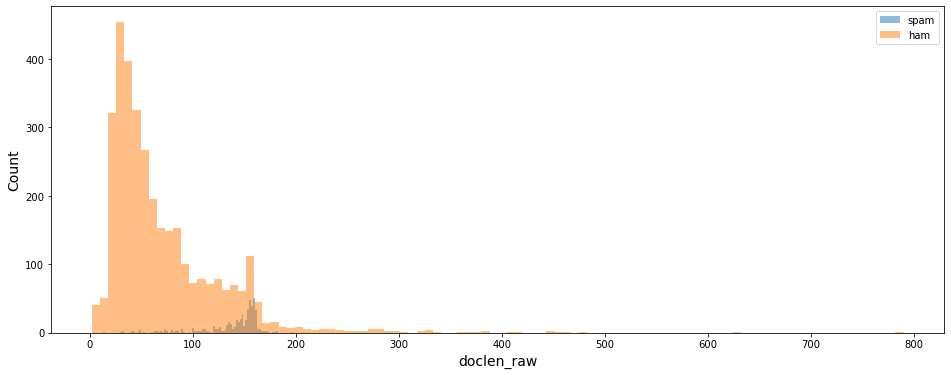

In [13]:
plot_target_hist(X_pos, X_neg, "doclen_raw")

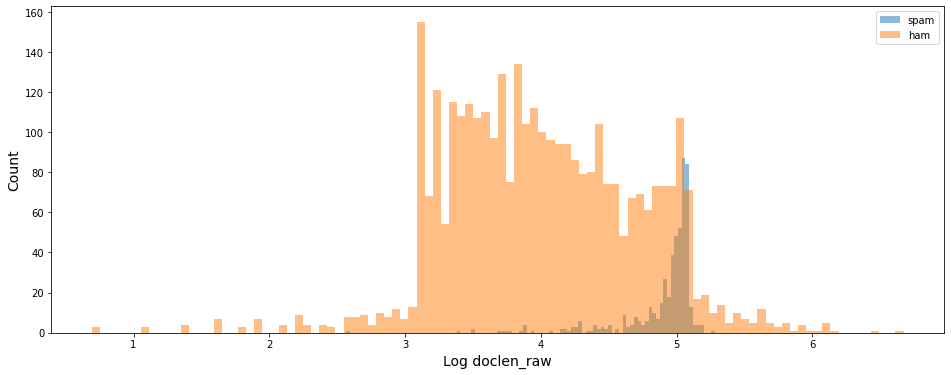

In [14]:
plot_target_hist(X_pos, X_neg, "doclen_raw", log_=True)

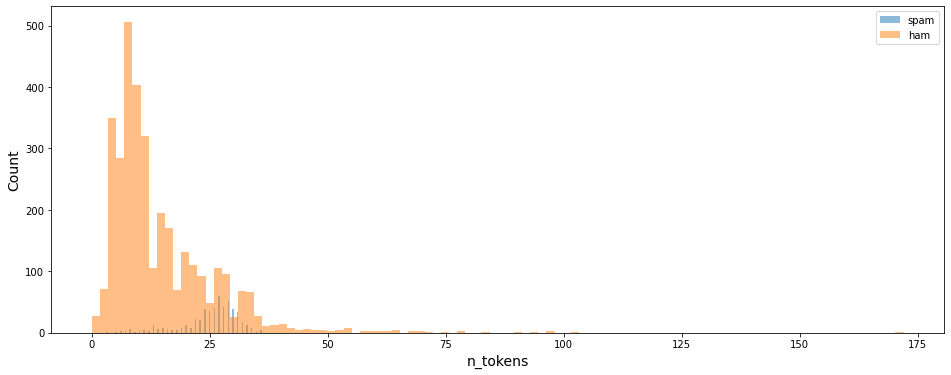

In [17]:
plot_target_hist(X_pos, X_neg, "n_tokens")

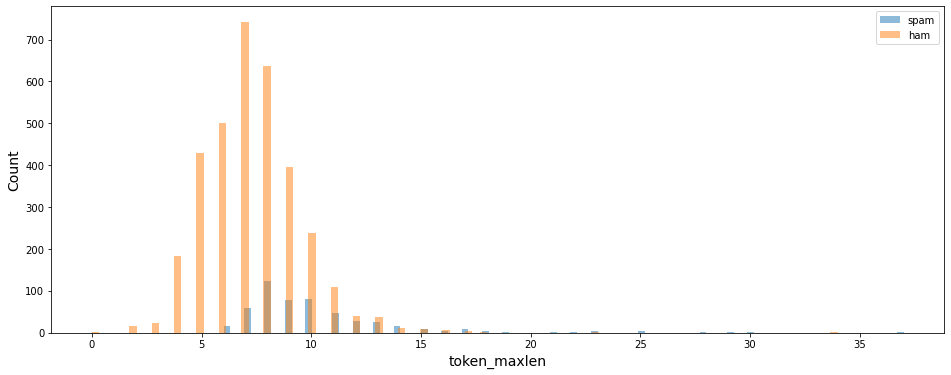

In [19]:
plot_target_hist(X_pos, X_neg, "token_maxlen")

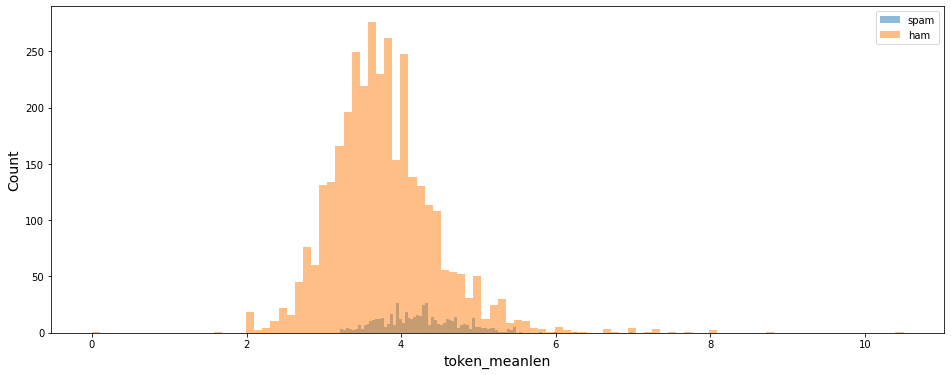

In [22]:
plot_target_hist(X_pos, X_neg, "token_meanlen")

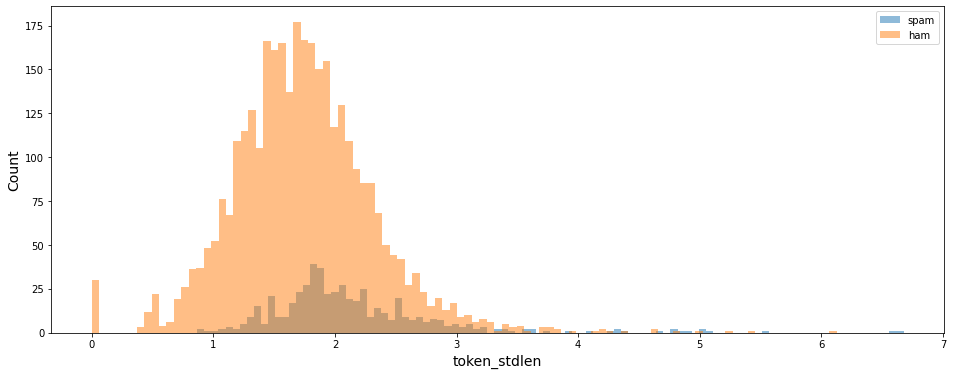

In [24]:
plot_target_hist(X_pos, X_neg, "token_stdlen")

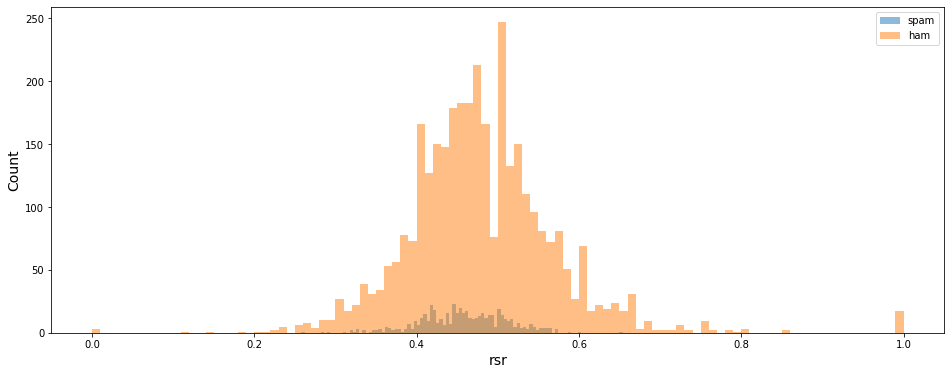

In [25]:
plot_target_hist(X_pos, X_neg, "rsr")

---